#1.0. Introdução

Este programa tem como propósito simular a disponibilidade de uma aplicação chamada "Buy@", utilizando o método de simulação denominado 'Cadeia de Markov'. Esse modelo representa uma sequência de eventos em que a probabilidade de transição para o próximo estado depende exclusivamente do estado atual, não sendo influenciada pela sequência de eventos que antecedeu esse estado.
<br><br>
No âmbito deste estudo, os estados considerados são 'disponível' e 'indisponível', refletindo os momentos em que o site está acessível e inacessível, respectivamente.

##1.1. Objetivos

Esta simulação tem como objetivo evidenciar de maneira transparente a diferença entre a disponibilidade do sistema atual e a disponibilidade do sistema após a implementação das melhorias propostas pelo time de desenvolvimento. Isso viabiliza uma comparação quantitativa entre os dois sistemas, tornando claro qual opção é mais adequada diante da necessidade de atender ao Requisito Não Funcional 4 (RNF04), que estabelece que a aplicação deve alcançar uma disponibilidade de 99,9%.

---

Obervação: Devido à ausência de dados reais que representem a atual disponibilidade real da aplicação, todos os dados utilizados são baseados em estimativas, e portanto não devem ser levados em consideração para rotular de fato a como disponibilidade da plataforma "Buy@" se comporta atualmente.



---



#2.0. Simulação do Sistema Atual

##2.1. Importação de dependências



O primeiro passo consiste na importação das bibliotecas essenciais para a construção da Cadeia de Markov. As bibliotecas selecionadas incluem

* Numpy: usada principalmente para realizar operações numéricas e manipulações de arrays multidimensionais;
* Random :fornece funções para a geração de números pseudoaleatórios;
* Matplotlib: ferramenta de visualização de dados em Python

A importação dessas dependências pode ser observada na célula de código a seguir:


In [2]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

##2.2. Definição dos estados de transição

A etapa seguinte requer a definição dos estados de transição no sistema. No presente estudo, os estados simulados são os seguintes

* Availabe(disponível): estado no qual a aplicação encontra-se disponível e pode ser acessada livremente pelos usuários;
* Unavailable(indisponível): estando no qual a aplicação encontra-se indisponível e portanto não pode ser acessada pelos usuários.

As transições entre esses estados segue a seguinte probabilidade:

* Availabe --> Availabe(AA): probabilidade do sistema estar disponível e continuar disponível = 90%;
* Availabe --> Unavailable(AU): probabilidade do sistema estar disponível e tornar-se indisponível = 10%;
* Unavailable --> Unavailable(UU): probabilidade do sistema estar indisponível e continuar indisponível = 20%;
* Unavailable --> Availabe: probabilidade do sistema estar indisponível e se recuperar da falha, tornando-se disponível novamente = 80%

A definição dessas transições pode ser observada na célula de código a seguir

In [3]:
# The statespace
states = ["available", "unavailable"]

# Possible sequences of events
transitionName = [["AA","UA"],["UU","UA"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.95,0.05],[0.30,0.70]]

##2.3. Coferindo possíveis erros

A etapa subsequente envolve a validação dos valores fornecidos como probabilidade de transição para garantir que estejam em conformidade com a lógica matemática. Essa lógica é fundamentada no princípio de que a soma da probabilidade de um evento ocorrer com a probabilidade de não ocorrer totaliza a quantidade total de eventos possíveis. Portanto, caso a soma dessas duas probabilidades não atinja o valor de 1 (100%), torna-se imperativo redefinir os valores das transições anteriormente propostas.

In [4]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1]) != 2:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


##2.4 Construção da Cadeia de Markov

Em seguida, é essencial desenvolver o algoritmo responsável por realizar a transição de valores com base nos pesos (probabilidades) previamente definidos. Para essa finalidade, foi concebida a função markovSimulation(), a qual recebe como parâmetro o número de execuções desejadas, ou seja, a quantidade de requisições que serão efetuadas na plataforma Buy@, proporcionando uma visão de seu desempenho diante do cenário estabelecido.
<br><br>
Dentro dessa função, é implementada uma estrutura de repetição que opera até alcançar o número desejado de requisições. No decorrer desse ciclo, o sistema sorteia dinamicamente o novo estado com base nas probabilidades de transição anteriormente descritas e ajusta dinamicamente esse estado conforme o valor obtido. Adicionalmente, a função armazena a lista de estados assumidos pela aplicação ao longo das requisições, proporcionando ao final a obtenção do número total de estados.
<br><br>
Ao término da execução, a função registra a quantidade de estados disponíveis e indisponíveis, viabilizando a comparação para determinar qual estado predominou ao longo da simulação.
<br><br>
A estrutura da função pode ser visualizada a seguir:

In [5]:
def markovSimulation(req):
    # Choose the starting state
    state = "available"
    stateList = [state]
    count_available = 1
    count_unavailable = 0
    i = 1
    # To calculate the probability of the stateList
    prob = 1
    mtbf_count = 0
    mttr_count = 0
    current_state_start_time = 0

    while i < req:
        if state == "available":
            change = np.random.choice(
                transitionName[0], replace=True, p=transitionMatrix[0]
            )
            if change == "AA":
                prob = prob * 0.95
                stateList.append("available")
                count_available += 1
            else:
                prob = prob * 0.05
                state = "unavailable"
                stateList.append("unavailable")
                count_unavailable += 1
                current_state_start_time = i  # Registration of the initial time of the unavailable state

        else:
            change = np.random.choice(
                transitionName[1], replace=True, p=transitionMatrix[1]
            )
            if change == "UU":
                prob = prob * 0.3
                stateList.append("unavailable")
                count_unavailable += 1
            else:
                prob = prob * 0.7
                state = "available"
                stateList.append("available")
                count_available += 1
                mttr_count += i - current_state_start_time  # Repair time recording
                current_state_start_time = i  # Registration of the initial time of the available state

        i += 1

    mtbf = current_state_start_time / (count_unavailable - 1) if count_unavailable > 1 else 0  # Avoid division by zero
    mttr = mttr_count / count_unavailable if count_unavailable > 0 else 0

    return stateList, count_available, count_unavailable, mtbf, mttr



##2.5. Execução da Cadeia de Markov

O próximo passo envolve a execução da Cadeia de Markov para observar o comportamento da simulação. Neste estudo, serão realizadas 100.000 (cem mil) requisições. A escolha desse número visa garantir uma representação mais precisa da realidade da Meta, uma empresa global que conta com dezenas de milhares de funcionários, potencialmente acessando a simulação simultaneamente em cenários mais extremos. Dessa maneira, ao assegurar que o sistema opera normalmente em situações de sobrecarga extrema, sua eficácia em cenários mais simples e cotidianos também é assegurada.
<br><br>
Ao final da execução, serão coletadas as seguintes métricas da aplicação:
* Número total de estados;
* Número de estados em que a aplicação esteve disponível;
* Número de estados em que a aplicação esteve indisponível;
* A disponibilidade do sistema em porcentagem de tempo;
* MBTF:  média do tempo decorrido entre duas falhas consecutivas em um sistema ou componente. Em outras palavras, é a média do tempo que um sistema pode operar continuamente sem experimentar uma falha.
* MTTR:média do tempo necessário para reparar um sistema ou componente após uma falha. Em outras palavras, representa o tempo médio que leva para restaurar o sistema à operação normal após uma falha.
<br><br>

A execução desse modelo pode ser observada a seguir:

In [6]:
states, numAvailable, numUnavailable, mbtf, mttr = markovSimulation(100000)
availableTime = (numAvailable / len(states)) * 100

print(len(states))
print(numAvailable)
print(numUnavailable)
print(f"The system availability is {availableTime}%")
print(f"MTBF: {mbtf} time units")
print(f"MTTR: {mttr} time units")

100000
93251
6749
The system availability is 93.25099999999999%
MTBF: 14.816686425607587 time units
MTTR: 1.0 time units


##2.6. Representado os resultados de maneira visual

Com o intuito de facilitar a compreensão dos dados obtidos, foram desenvolvidas duas funções encarregadas de gerar gráficos baseados nos resultados da execução da Cadeia de Markov.
<br><br>
A primeira função, intitulada `plotStateDistribution()`, produz um gráfico de barras que compara a quantidade de vezes em que a aplicação esteve disponível e indisponível.
<br><br>
Por sua vez, a segunda função, denominada `plotAvailability()`, apresenta o estado da aplicação ao longo das requisições, evidenciando como a aplicação se comportou durante todo o período de execução.

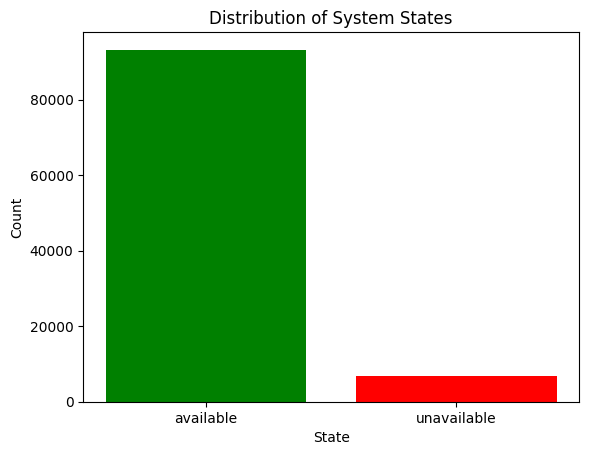

In [8]:
def plotStateDistribution(states):
    fig, ax = plt.subplots()

    unique, counts = np.unique(states, return_counts=True)

    ax.bar(unique, counts, color=['green', 'red'])
    ax.set_xlabel("State")
    ax.set_ylabel("Count")
    ax.set_title("Distribution of System States")

    plt.show()

# Chame a função para gerar o gráfico
plotStateDistribution(states)

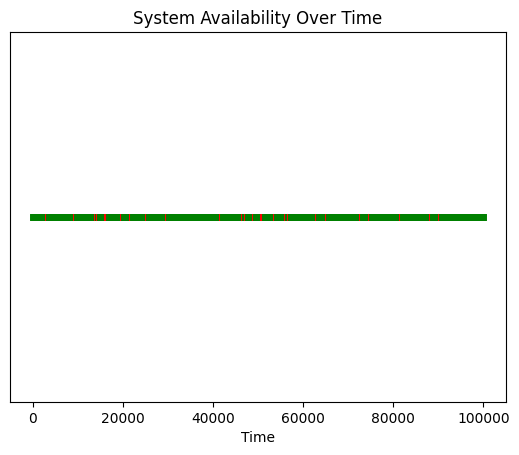

In [7]:
def plotAvailability(states):
    fig, ax = plt.subplots()

    for i in range(len(states) - 1):
        if states[i] == "available":
            color = "green"
        else:
            color = "red"

        ax.plot([i, i + 1], [0, 0], color=color, linewidth=5)

    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlabel("Time")
    ax.set_title("System Availability Over Time")

    plt.show()

# Chame a função para gerar o gráfico
plotAvailability(states)

##2.7. Analise dos resultados

Com base na análise dos dados coletados durante a simulação, atualmente, a aplicação possui uma disponibilidade de 93%. Isso significa que em 93% das vezes em que uma requisição é realizada, a aplicação está disponível para ser acessada. Em uma primeira avaliação, esse número pode parecer atrativo, sugerindo um bom funcionamento da aplicação. No entanto, para os padrões atuais, essa disponibilidade está consideravelmente abaixo do esperado para empresas de grande porte, como a "Meta". Esse valor indica que, em um mês, a aplicação fica indisponível por aproximadamente 36 horas, o que representa um indicativo desfavorável de desempenho para uma ferramenta amplamente utilizada pela equipe de compras global da Meta, podendo resultar em gargalos em algumas operações.
<br><br>
Além disso, é crucial analisar os conceitos de MTBF (Mean Time Between Failures) e MTTR (Mean Time To Recover). O MTBF de 15 unidades de medida indica que o sistema, em média, consegue se manter operacional por 15 unidades de tempo (neste caso, segundos) antes de apresentar uma falha. Considerando que o tempo total da simulação foi de aproximadamente 100 segundos (conforme pode ser observado no gráfico 2), isso sugere que a aplicação mantém um tempo considerável de disponibilidade antes de ocorrer uma falha, mas há margem para melhorias, a fim de aumentar esse intervalo entre falhas.
<br><br>
Quanto ao MTTR de 1 unidade de tempo (neste caso, segundos), ele indica que o sistema leva apenas 1 segundo para se recuperar de uma falha, o que é uma métrica positiva. No entanto, também há espaço para otimização, visando a redução desse tempo de recuperação e, eventualmente, alcançar uma disponibilidade quase completa da aplicação.

##2.8. Conclusões Parciais

A partir da simulação do sistema atual, fica evidente a necessidade de uma reformulação na arquitetura vigente, uma vez que a disponibilidade da aplicação está ligeiramente distante do requisito não funcional estabelecido, que é de 99,9% (RNF04). Diante dos dados coletados, percebe-se a urgência de aprimorar a resiliência do sistema diante de falhas, o que sugere a implementação de algumas medidas arquiteturais. Estas incluem:

* Redundância: A criação de máquinas virtuais desempenhando a mesma função do Buy@ apresenta-se como uma proposta interessante para assegurar a disponibilidade da aplicação. Dessa forma, caso uma das máquinas esteja sobrecarregada ou indisponível, outra pode ser acionada imediatamente para assumir ou dividir o trabalho da anterior. Isso garante a integridade da aplicação e a recuperação quase instantânea do site.

* Semáforos: Em sistemas assíncronos, um desafio que pode surgir é o acúmulo de requisições durante o período em que a aplicação está indisponível. Para contornar esse problema, a utilização de semáforos é uma abordagem eficaz. Essas ferramentas criam filas de requisições que chegam durante a indisponibilidade da aplicação e, após a sua recuperação, direcionam de maneira controlada e organizada essas requisições. Isso impede que uma onda de requisições atinja a aplicação simultaneamente, evitando sobrecargas que poderiam torná-la indisponível novamente.